# Random Forest

### Setup

In [3]:
# Import necessary packages
import numpy as np # Numerical computation package
import pandas as pd # Dataframe package
import matplotlib.pyplot as plt # Plotting package
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Random Forest estimator
from sklearn.metrics import mean_absolute_error # Metrics
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV # Grid search function
from PIL import Image

np.random.seed(1) # Set the random seed for reproduceability

In [4]:
# Load the data and clean the Columns
ped = pd.read_csv("data_clean_with_dummies.csv")
ped = ped.drop(["time", "Unnamed: 0"], axis = 1)

# Define a new X with the squared feature k = 0.99, 57+46
X = np.array(ped[ped.columns[57:103]])

# Output to predict
y = ped["pedestrians count"]

# Split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)

## Hyperparametertuning

### Establish baseline

In [55]:
# Initiate Random Forest with standard parameters as a basline
forest_baseline = RandomForestRegressor()
forest_baseline.fit(Xtrain, ytrain)

# Measure the MAE and the Score for the test and the trining data
rf_mae_train_baseline = mean_absolute_error(ytrain, forest_baseline.predict(Xtrain))
rf_mae_test_baseline = mean_absolute_error(ytest, forest_baseline.predict(Xtest))
rf_score_train_baseline = forest_baseline.score(Xtrain, ytrain)
rf_score_test_basline = forest_baseline.score(Xtest, ytest)

----- Baseline MAE and Score -----

-- Training data MAE --
Random forest MAE   :       148.55
Random forest Score :         0.99

-- Validation data MAE --
Random forest MAE   :     343.34
Random forest Score :       0.94


In [69]:
# Print results
print("----- Baseline MAE and Score -----")
print()
print("-- Training data MAE --")
print(f"Random forest MAE   :   {rf_mae_train_baseline:>10.2f}")
print(f"Random forest Score :   {rf_score_train_baseline:>10.2f}")
print()
print("-- Validation data MAE --")
print(f"Random forest MAE   : {rf_mae_test_baseline:>10.2f}")
print(f"Random forest Score : {rf_score_test_basline:>10.2f}")

# Setting the baseline as the best values and change it if better appear
rf_mae_train_best = rf_mae_train_baseline
rf_score_train_best = rf_score_train_baseline
rf_mae_test_best = rf_mae_test_baseline
rf_score_test_best = rf_score_test_basline

----- Baseline MAE and Score -----

-- Training data MAE --
Random forest MAE   :       148.55
Random forest Score :         0.99

-- Validation data MAE --
Random forest MAE   :     343.34
Random forest Score :       0.94


----- Baseline MAE and Score -----

-- Training data MAE --

Random forest MAE     :     149.10

Random forest Score     :       0.99

-- Validation data MAE --

Random forest MAE     :     344.40

Random forest Score     :       0.94

In [57]:
#Values for baseline:
rf_mae_train_baseline = 148.55336355565623
rf_score_train_baseline = 0.9888524068978641
rf_mae_test_baseline = 343.3444816141011
rf_score_test_basline = 0.9442426729345713

### Exploratory Parameter analasys

Estimators1

In [209]:
#n_estimators: how many trees should we consider , Defalut = 100
n_estimators = [int(x) for x in range(50, 601, 50)]
#ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning,  Defalut = 0
ccp_alpha = [x for x in np.linspace(0, 0.1, 11)]
#The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node  Defalut = None, only measurabel, when using high numbers
max_depth = [int(x) for x in range(10, 121, 10)]
##################################################max_depth.append(99999)

# This resembles the number of maximum features provided to each tree in a random forest,  Defalut = 1
max_features = [int(x) for x in range(1, 41, 2)]
##################################################max_features.extend(["sqrt", "log2", None])

# min_sample_split: the minimum required number of observations in node in order to split it  Defalut = 2
min_samples_split = [int(x) for x in range(8, 15, 1)]
# min_samples_leaf: minimum number of samples that should be present in the leaf node after splitting a node  Defalut = 1
min_samples_leaf = [int(x) for x in range(1, 15, 1)]

#Create a dict with all parameters
all_parameters_dict = {"n_estimators":n_estimators, "ccp_alpha":ccp_alpha, "max_depth":max_depth, "max_features":max_features,
                        "min_samples_split":min_samples_split, "min_samples_leaf":min_samples_leaf}

Estimators2

In [34]:
#n_estimators: how many trees should we consider , Defalut = 100
n_estimators = [int(x) for x in range(400, 601, 50)]
#ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning,  Defalut = 0
ccp_alpha = [x for x in np.linspace(0, 0.2, 10)]
#The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node  Defalut = None, only measurabel, when using high numbers
max_depth = [int(x) for x in range(10, 30, 2)]
max_depth2 = [int(x) for x in range(180, 201, 10)]
max_depth.extend(max_depth2)
##################################################max_depth.append(99999)

# This resembles the number of maximum features provided to each tree in a random forest,  Defalut = 1
max_features = [int(x) for x in range(50, 60, 2)]
max_features.insert(0,1)
##################################################max_features.extend(["sqrt", "log2", None])

# min_sample_split: the minimum required number of observations in node in order to split it  Defalut = 2
min_samples_split = [int(x) for x in range(12, 30, 2)]
# min_samples_leaf: minimum number of samples that should be present in the leaf node after splitting a node  Defalut = 1
min_samples_leaf = [x for x in np.linspace(2, 6, 10)]


#Create a dict with all parameters
all_parameters_dict = {"n_estimators":n_estimators, "ccp_alpha":ccp_alpha, "max_depth":max_depth, "max_features":max_features,
                        "min_samples_split":min_samples_split, "min_samples_leaf":min_samples_leaf}

Testing parameters on Defoult tree

In [36]:
# Creating lists for all values given by filure whatever
score_train_total = []
score_test_total = []
MAE_train_total = []
MAE_test_total = []
print("start")
#Loop over lis with all parameters
for parameter_n in list(all_parameters_dict.values()):
   #create a list for all scores for the different Models
   score_train = []
   score_test = []
   MAE_train = []
   MAE_test = []
   #for parameter n_estimator
   if parameter_n == list(all_parameters_dict.values())[0]:
      print(0)
#go over all different N_estimators
      for ne in list(all_parameters_dict.values())[0]:
      #grow and fit the forest
         forest_base_changed = RandomForestRegressor(n_estimators=ne, random_state=144,n_jobs=-1)
         forest_base_changed.fit(Xtrain, ytrain)
         #get the score of the model
         score_i = forest_base_changed.score(Xtrain, ytrain)
         score_train.append(score_i)
         score_i = forest_base_changed.score(Xtest, ytest)
         score_test.append(score_i)
         MAE_i = mean_absolute_error(ytrain, forest_base_changed.predict(Xtrain))
         MAE_train.append(MAE_i)
         MAE_i = mean_absolute_error(ytest, forest_base_changed.predict(Xtest))
         MAE_test.append(MAE_i)
   ################################################################################################
   if parameter_n == list(all_parameters_dict.values())[1]:
      print(0.2)
#go over all different ccp_alpha
      for ne in list(all_parameters_dict.values())[1]:
         #grow and fit the forest
         forest_base_changed = RandomForestRegressor(ccp_alpha=ne, random_state=144,n_jobs=-1)
         forest_base_changed.fit(Xtrain, ytrain)
         #get the score of the model
         score_i = forest_base_changed.score(Xtrain, ytrain)
         score_train.append(score_i)
         score_i = forest_base_changed.score(Xtest, ytest)
         score_test.append(score_i)
         MAE_i = mean_absolute_error(ytrain, forest_base_changed.predict(Xtrain))
         MAE_train.append(MAE_i)
         MAE_i = mean_absolute_error(ytest, forest_base_changed.predict(Xtest))
         MAE_test.append(MAE_i)
   ################################################################################################
   if parameter_n == list(all_parameters_dict.values())[2]:
      print(0.4)
#go over all different N_estimators
      for ne in list(all_parameters_dict.values())[2]:
         #grow and fit the forest
         forest_base_changed = RandomForestRegressor(max_depth=ne, random_state=144,n_jobs=-1)
         forest_base_changed.fit(Xtrain, ytrain)
         #get the score of the model
         score_i = forest_base_changed.score(Xtrain, ytrain)
         score_train.append(score_i)
         score_i = forest_base_changed.score(Xtest, ytest)
         score_test.append(score_i)
         MAE_i = mean_absolute_error(ytrain, forest_base_changed.predict(Xtrain))
         MAE_train.append(MAE_i)
         MAE_i = mean_absolute_error(ytest, forest_base_changed.predict(Xtest))
         MAE_test.append(MAE_i)
   ###########################################################################################################
   if parameter_n == list(all_parameters_dict.values())[3]:
      print(0.6)
#go over all different N_estimators
      for ne in list(all_parameters_dict.values())[3]:
         #grow and fit the forest
         forest_base_changed = RandomForestRegressor(max_features=ne, random_state=144,n_jobs=-1)
         forest_base_changed.fit(Xtrain, ytrain)
         #get the score of the model
         score_i = forest_base_changed.score(Xtrain, ytrain)
         score_train.append(score_i)
         score_i = forest_base_changed.score(Xtest, ytest)
         score_test.append(score_i)
         MAE_i = mean_absolute_error(ytrain, forest_base_changed.predict(Xtrain))
         MAE_train.append(MAE_i)
         MAE_i = mean_absolute_error(ytest, forest_base_changed.predict(Xtest))
         MAE_test.append(MAE_i)
   ###########################################################################################################
   if parameter_n == list(all_parameters_dict.values())[4]:
      print(0.8)
#go over all different N_estimators
      for ne in list(all_parameters_dict.values())[4]:
         #grow and fit the forest
         forest_base_changed = RandomForestRegressor(min_samples_split=ne, random_state=144,n_jobs=-1)
         forest_base_changed.fit(Xtrain, ytrain)
         #get the score of the model
         score_i = forest_base_changed.score(Xtrain, ytrain)
         score_train.append(score_i)
         score_i = forest_base_changed.score(Xtest, ytest)
         score_test.append(score_i)
         MAE_i = mean_absolute_error(ytrain, forest_base_changed.predict(Xtrain))
         MAE_train.append(MAE_i)
         MAE_i = mean_absolute_error(ytest, forest_base_changed.predict(Xtest))
         MAE_test.append(MAE_i)
   ###########################################################################################################
   if parameter_n == list(all_parameters_dict.values())[5]:
      print("Almoste Done")
#go over all different N_estimators
      for ne in list(all_parameters_dict.values())[5]:
         #grow and fit the forest
         forest_base_changed = RandomForestRegressor(min_samples_leaf=ne, random_state=144,n_jobs=-1)
         forest_base_changed.fit(Xtrain, ytrain)
         #get the score of the model
         score_i = forest_base_changed.score(Xtrain, ytrain)
         score_train.append(score_i)
         score_i = forest_base_changed.score(Xtest, ytest)
         score_test.append(score_i)
         MAE_i = mean_absolute_error(ytrain, forest_base_changed.predict(Xtrain))
         MAE_train.append(MAE_i)
         MAE_i = mean_absolute_error(ytest, forest_base_changed.predict(Xtest))
         MAE_test.append(MAE_i)
   ###########################################################################################################

#add this scores to the total score list
      
   #After If
   score_train_total.append(score_train)
   score_test_total.append(score_test)
   MAE_train_total.append(MAE_train)
   MAE_test_total.append(MAE_test)

start
start loop
1
start loop
2
start loop
3
start loop
4
start loop
5
start loop
6


In [39]:
#To save tha values for later
print(score_train_total,score_test_total,MAE_train_total,MAE_test_total)

[[0.9888575254678814, 0.9888326630486622, 0.9888799247117469, 0.9888555507976431, 0.9889042720032142], [0.9885641307841996, 0.9885635300906446, 0.9885629279986852, 0.9885624255389829, 0.9885616541265269, 0.9885610014272808, 0.9885603589271654, 0.9885596702549322, 0.9885588725035993, 0.9885584142251004], [0.9549355994206329, 0.9697288753776158, 0.9781695027671216, 0.9829915463622507, 0.9856359215896638, 0.9870032456038443, 0.9877828129514972, 0.9881446515110442, 0.9883720776711831, 0.988514446410157, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996], [0.9807476707706404, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996], [0.9792582101969849, 0.9774683711091371, 0.9757166478129571, 0.9740576125618338, 0.9723627280451084, 0.9707187526473907, 0.9691699398431499, 0.9675551419435696, 0.9664012746654143], [-2.8312219235715474e-10, -2.8312241440175967e-10, -2.8312241440175967e-10, -2.8312219235715474e-10, -2.8312219235715474e-10, -2.8

For the first:
[[0.9883148323895521, 0.9885641307841996, 0.9886535070045926, 0.9887821287488149, 0.9888259380622331, 0.9888659029968215, 0.9888737648723838, 0.9888575254678814, 0.9888326630486622, 0.9888799247117469, 0.9888555507976431, 0.9889042720032142], [0.9885641307841996, 0.988563865576797, 0.9885635621606668, 0.9885633755530476, 0.988563016805102, 0.9885628489693631, 0.9885625671304171, 0.988562260965149, 0.9885620078641172, 0.988561616950566, 0.9885612493915056], [0.9549355994206329, 0.9870032456038443, 0.9885479199303213, 0.9885584317352778, 0.9885643078332068, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996], [0.9807476707706404, 0.9844451261760018, 0.9862512899541499, 0.986977952450395, 0.987544363149793, 0.9878111831235886, 0.9880389994232419, 0.9883625317569422, 0.9883734750110952, 0.9886946532544013, 0.9886819556932607, 0.9889229519214344, 0.9887838463333074, 0.9887559111724148, 0.9889146772717934, 0.9889364801649787, 0.9889525077557305, 0.988914422798607, 0.9889642999370172, 0.9889048464788144], [0.9885641307841996, 0.987890216516839, 0.9869942513154959, 0.9860747643759804, 0.9850736038472081, 0.9840873505474232, 0.9830639954136825, 0.9820863567771991, 0.9810742399449485, 0.9801187117670559, 0.9792582101969849, 0.9784348589856595, 0.9774683711091371], [0.9885641307841996, 0.9849108621818958, 0.9808887398396537, 0.9768667388175984, 0.9731733813318763, 0.9700478548586796, 0.9673175489516828, 0.9645845458008687, 0.9620148457449438, 0.9597516873041028, 0.9575818550985884, 0.9554473302833931, 0.953277551786317, 0.9514028996167414]] [[0.9408332654866445, 0.9417090031776849, 0.9426687056981793, 0.9428466447190603, 0.9433013279207194, 0.9433379911283247, 0.9436241191840352, 0.9434536411831066, 0.9435584901078073, 0.9436030697828183, 0.9436520394323606, 0.9436860060233953], [0.9417090031776849, 0.9417088554313655, 0.9417086738229739, 0.9417088100780105, 0.9417088285169184, 0.9417089089120575, 0.9417084138331723, 0.9417083386153045, 0.9417084568274369, 0.9417084412486676, 0.9417086475462754], [0.9343231141281216, 0.9423972395760509, 0.9420986649166239, 0.9415348089707412, 0.941690963524233, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849], [0.8882986421045476, 0.9158740941737659, 0.928288055860715, 0.9342035012102011, 0.9374697939173237, 0.9395468190501209, 0.9421608177372309, 0.9430743795398904, 0.9430035384259007, 0.9441506505243935, 0.9448575071623042, 0.9458353880464637, 0.9453957285271233, 0.9452581228785237, 0.9451875282713492, 0.9464912444733709, 0.9464737484684363, 0.9451332686251545, 0.9460570278032464, 0.9455714722538724], [0.9417090031776849, 0.9421989947425826, 0.9424991365833821, 0.9423171475815695, 0.9427234005870636, 0.94276149716987, 0.9425031452080902, 0.94284342875038, 0.9427760820740253, 0.942948695388893, 0.9436926379695757, 0.9437872068181982, 0.9437190133922108], [0.9417090031776849, 0.9435784385195114, 0.9441914826339923, 0.9440755032984371, 0.9437431100103214, 0.943297153089113, 0.9433542050920195, 0.9424561279317353, 0.941394610630752, 0.9408117385552921, 0.940046655549776, 0.939489340123586, 0.9384179763287585, 0.9379682783691424]] [[150.81786139091915, 149.6815765655223, 148.97744179598868, 148.7416976618007, 148.55029796864324, 148.1756283649563, 148.1557975492658, 148.1256091163126, 148.238021142007, 147.9887038649015, 148.05948781718118, 147.92719322163495], [149.6815765655223, 149.7723211680427, 149.8599409111144, 149.9378726357596, 150.01186656311077, 150.0825071754844, 150.14844577561738, 150.21333891574054, 150.27110506041575, 150.33202776473064, 150.3883583922141], [341.48547592516223, 170.77429936390436, 150.91933086484622, 149.6258586813344, 149.68578537947582, 149.6815765655223, 149.6815765655223, 149.68157656552236, 149.68157656552236, 149.6815765655223, 149.6815765655223, 149.6815765655223], [232.7174647415014, 189.71119847924427, 174.77684551558778, 168.76389901006743, 163.89418355491793, 161.04566795412597, 159.3444094260881, 156.6220774648814, 156.81142182771237, 153.80629996687807, 154.45821699013393, 151.2292561603074, 152.63684487385484, 151.70694302926273, 150.52932166549212, 149.89487473891742, 149.82653270358063, 149.45326223504145, 148.7148947094869, 148.9385682317192], [149.68157656552233, 153.48016380133564, 158.71914797989092, 165.1295842364544, 171.59531295706924, 178.05485137734013, 184.70659437697256, 190.53038589139152, 196.8353514332237, 202.09529584538728, 207.2789822815427, 212.07118914043647, 216.92626370699492], [149.68157656552233, 168.2749983859422, 189.4041836351781, 209.6310190041442, 227.42514025340358, 241.65073352039147, 254.488541303598, 266.18597843648524, 276.6496768175575, 286.093782040575, 294.4859084414285, 302.93895233502417, 310.8641069445193, 318.10157433899815]] [[347.54411310729444, 344.8315861855159, 344.02288186406895, 343.4931575007657, 342.9547708938968, 342.6552645553794, 342.5370049816789, 342.655815244067, 342.4069206157488, 342.4079904034768, 342.19417121312614, 342.16264466217336], [344.8315861855159, 344.81447120592395, 344.80178869004, 344.78994528352774, 344.77799625113744, 344.77171706328386, 344.7658682700799, 344.76196876732024, 344.7496772073766, 344.7399571122737, 344.72609362867155], [402.3803578567484, 341.56497138421946, 342.17665258947534, 344.45156676826923, 344.8835648639013, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159], [574.0728931782796, 462.1691125578704, 418.07236675582084, 401.14653801273835, 388.56102592454806, 380.6305967145256, 372.3024217475474, 368.80684556494697, 366.03115251598325, 360.2650063200989, 358.0016789649815, 351.8720582992312, 352.4052734753913, 350.09160474623155, 349.9618446393498, 345.9973674602549, 347.24028609296397, 345.332571042769, 344.2344450999485, 343.2546772009216], [344.8315861855159, 344.0798067399723, 343.75465563989087, 344.33383368163595, 342.352731629111, 342.3232409227082, 343.02270445493986, 342.5792274431331, 343.1148897739765, 342.7803584797767, 341.5303386815333, 341.6330680629022, 342.364899223389], [344.8315861855159, 338.55364958047227, 336.8012856398014, 336.81202651047283, 337.73677166475613, 338.2574180987674, 339.9981394802743, 343.03657151536083, 346.8296064848177, 349.8667167338806, 352.1147692822997, 354.97686600217276, 358.9778829104884, 361.79440347273834]]

For teh secound:
[[0.9888575254678814, 0.9888326630486622, 0.9888799247117469, 0.9888555507976431, 0.9889042720032142], [0.9885641307841996, 0.9885635300906446, 0.9885629279986852, 0.9885624255389829, 0.9885616541265269, 0.9885610014272808, 0.9885603589271654, 0.9885596702549322, 0.9885588725035993, 0.9885584142251004], [0.9549355994206329, 0.9697288753776158, 0.9781695027671216, 0.9829915463622507, 0.9856359215896638, 0.9870032456038443, 0.9877828129514972, 0.9881446515110442, 0.9883720776711831, 0.988514446410157, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996], [0.9807476707706404, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996], [0.9792582101969849, 0.9774683711091371, 0.9757166478129571, 0.9740576125618338, 0.9723627280451084, 0.9707187526473907, 0.9691699398431499, 0.9675551419435696, 0.9664012746654143], [-2.8312219235715474e-10, -2.8312241440175967e-10, -2.8312241440175967e-10, -2.8312219235715474e-10, -2.8312219235715474e-10, -2.8312219235715474e-10, -2.8312241440175967e-10, -2.8312241440175967e-10, -2.8312219235715474e-10, -2.8312219235715474e-10]] [[0.9434536411831066, 0.9435584901078073, 0.9436030697828183, 0.9436520394323606, 0.9436860060233953], [0.9417090031776849, 0.9417084131545117, 0.9417088267003595, 0.9417081726202085, 0.9417084986762038, 0.94170812086172, 0.9417089294741958, 0.9417091246299232, 0.941710214638425, 0.9417116137773911], [0.9343231141281216, 0.9397147407952298, 0.9414502676270108, 0.9420181134608656, 0.9422802412689556, 0.9423972395760509, 0.9428526857459995, 0.942241254223621, 0.9428306381876758, 0.9422596976455244, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849], [0.8882986421045476, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849], [0.9436926379695757, 0.9437190133922108, 0.9435322542319576, 0.9435527024364103, 0.9428304721888391, 0.9427001571066654, 0.942233556206276, 0.9418381622336871, 0.9416595663420968], [-4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05]] [[148.1256091163126, 148.238021142007, 147.9887038649015, 148.05948781718118, 147.92719322163495], [149.68157656552233, 149.87727509005163, 150.04524853565522, 150.1901095186535, 150.32520236998465, 150.4448696198361, 150.55057969692842, 150.6498564081874, 150.7474647940924, 150.8358999463212], [341.48547592516223, 281.18720605870806, 237.0996860309178, 206.16864251197788, 184.53119422521672, 170.77429936390433, 161.76330359435735, 157.02243321524938, 154.1011375405454, 151.82484273766553, 149.6815765655223, 149.68157656552233, 149.6815765655223], [232.7174647415014, 149.6815765655223, 149.6815765655223, 149.6815765655223, 149.68157656552233, 149.68157656552233], [207.2789822815427, 216.92626370699494, 226.3887207803371, 234.38498934024182, 242.08384156077304, 249.14116614887152, 255.38212537881572, 261.5150746826853, 266.73087275673566], [2656.4893414296166, 2656.4893414296166, 2656.4893414296157, 2656.4893414296157, 2656.4893414296157, 2656.4893414296157, 2656.4893414296157, 2656.4893414296166, 2656.4893414296166, 2656.4893414296157]] [[342.655815244067, 342.4069206157488, 342.4079904034768, 342.19417121312614, 342.16264466217336], [344.8315861855159, 344.80116838678805, 344.77668893266014, 344.7598639394348, 344.740115664208, 344.7211385120819, 344.71097597393504, 344.6936120486399, 344.67876890599615, 344.664403565785], [402.3803578567484, 374.6684836837586, 357.8575075735068, 348.7122519089652, 343.50221838541466, 341.56497138421946, 340.2314380801709, 341.1811459717688, 341.69530379730804, 342.45775219760077, 344.8315861855159, 344.8315861855159, 344.8315861855159], [574.0728931782796, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159], [341.5303386815333, 342.364899223389, 343.2544451533146, 343.1312315679995, 344.8414190937105, 345.24665229628795, 346.338630419733, 347.7798896819186, 348.70641287355886], [2664.577282292878, 2664.577282292878, 2664.577282292878, 2664.5772822928784, 2664.577282292878, 2664.5772822928784, 2664.5772822928784, 2664.5772822928784, 2664.5772822928784, 2664.577282292878]]

Visualize results

C:\Users\Biebert\AppData\Local\Temp\ipykernel_10940\44793253.py:1: RuntimeWarning: invalid value encountered in double_scalars
  standardize_list = lambda x,list: (x - (sum(list) / len(list))) / np.std(list)


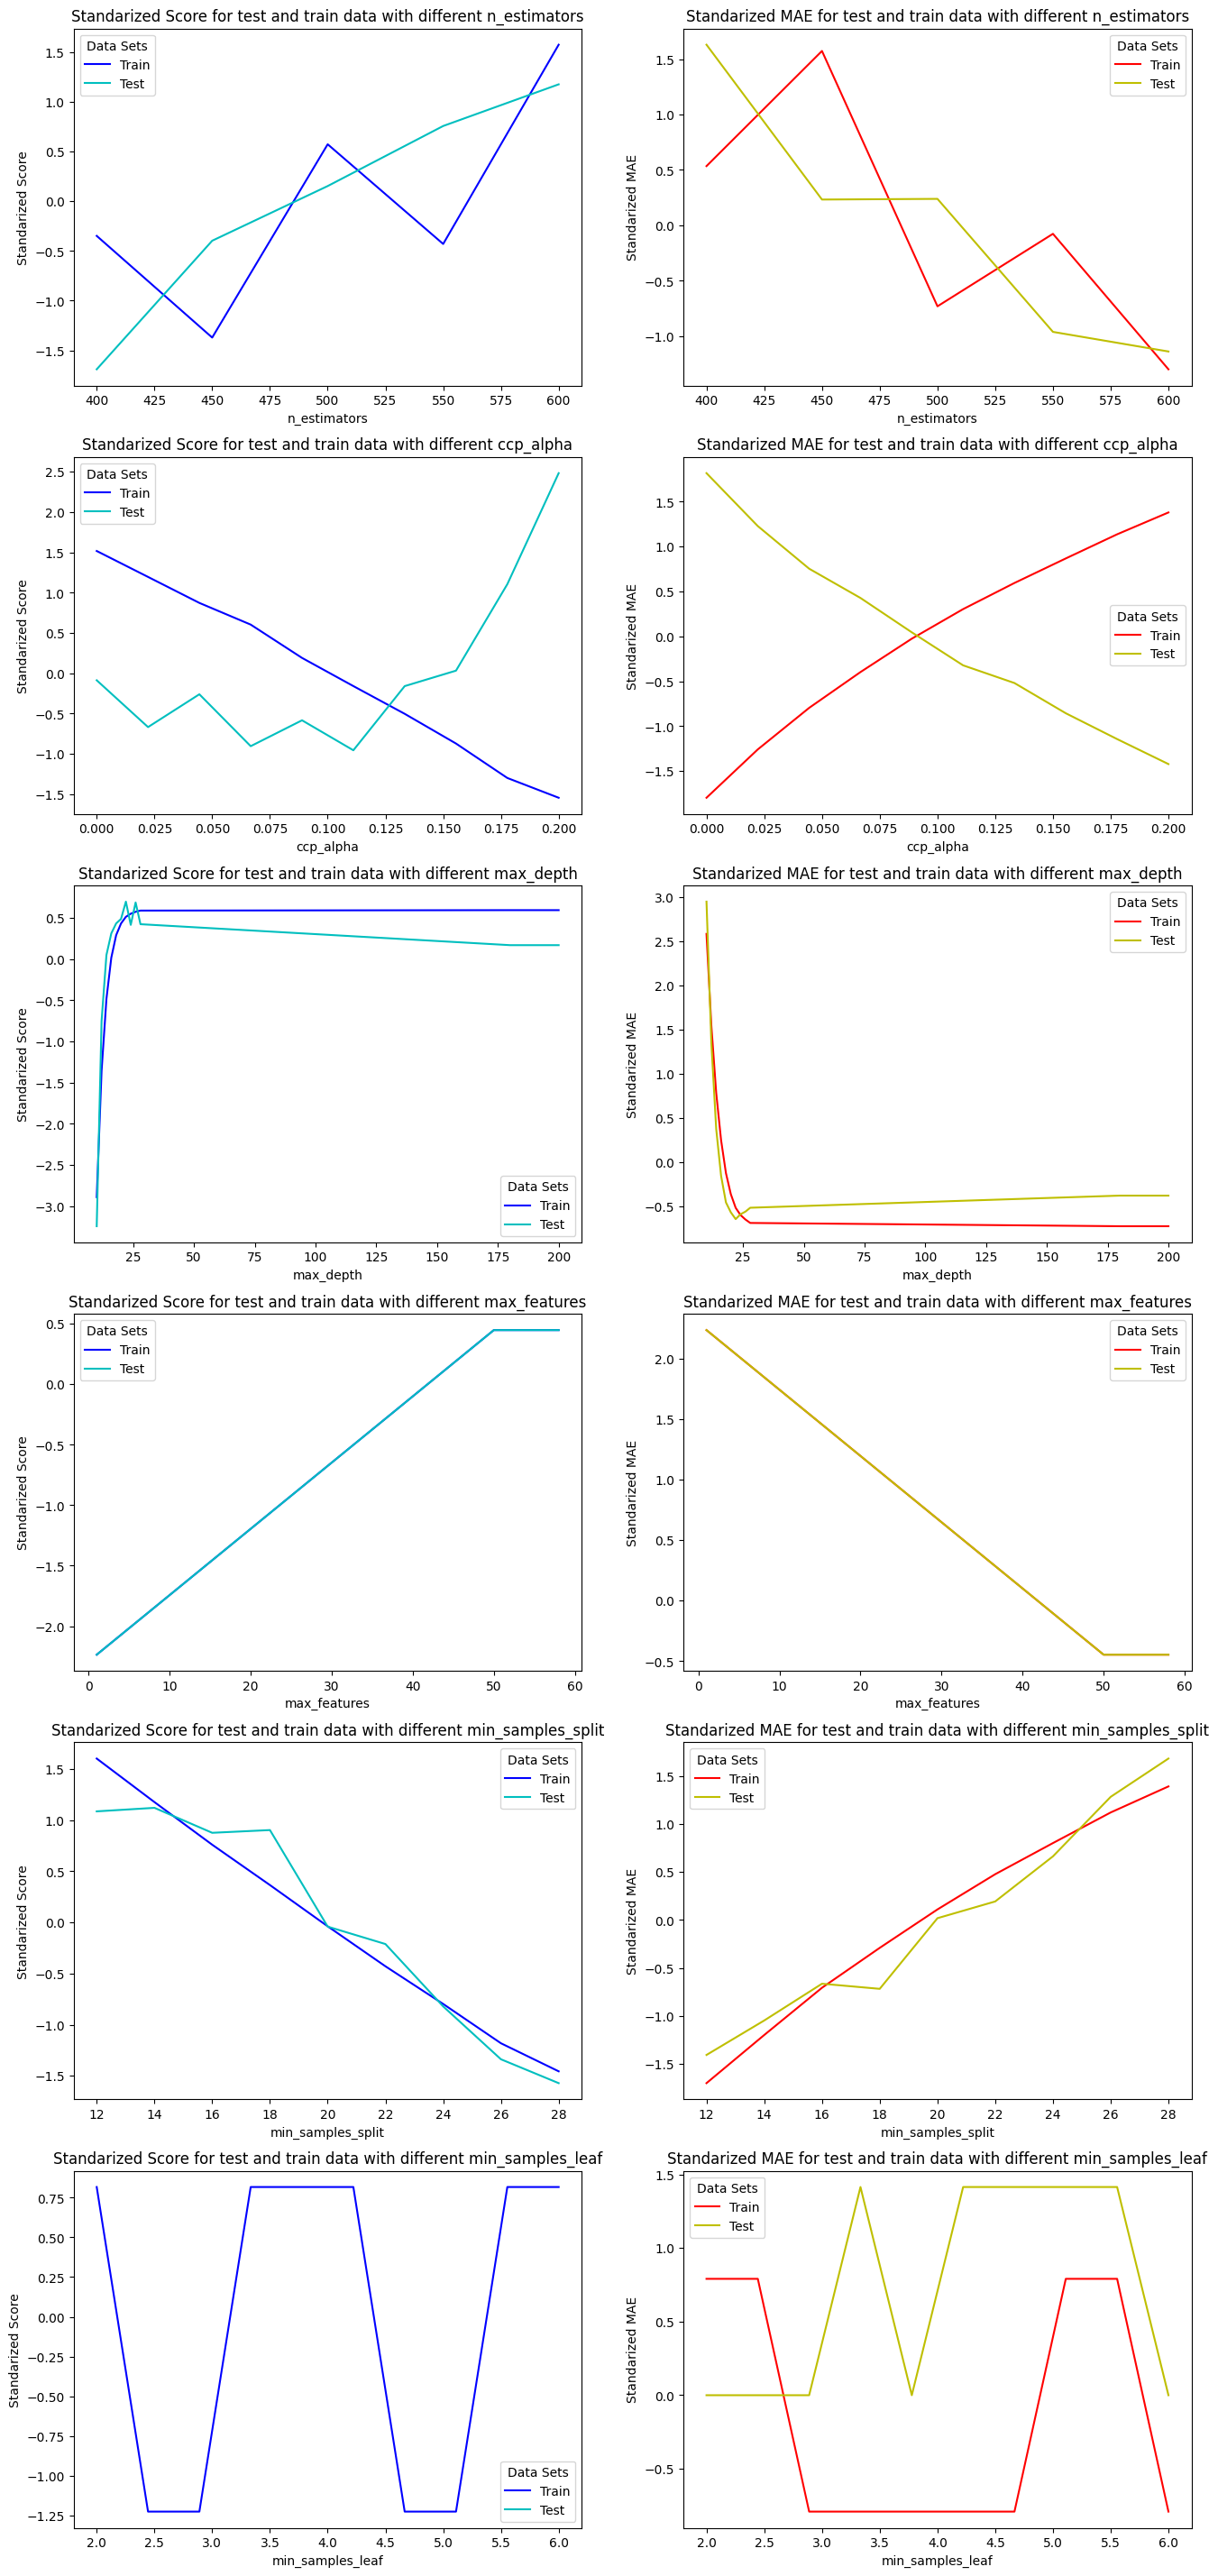

In [38]:
standardize_list = lambda x,list: (x - (sum(list) / len(list))) / np.std(list)

# Create a figure and axis, specify the figure size
fig, axs = plt.subplots(6, 2, figsize=(16, 36))#später 36

for n in range(len(score_train_total)):
    # Add the plot for MAE, standardized
    axs[n][0].plot(list(all_parameters_dict.values())[n], [standardize_list(i, score_train_total[n]) for i in score_train_total[n]],
                color="b", label="Train")
    axs[n][0].plot(list(all_parameters_dict.values())[n], [standardize_list(i, score_test_total[n]) for i in score_test_total[n]],
                color="c", label="Test")

    # Add the plot for score
    axs[n][1].plot(list(all_parameters_dict.values())[n], [standardize_list(i, MAE_train_total[n]) for i in MAE_train_total[n]], 
                color="r", label="Train")
    axs[n][1].plot(list(all_parameters_dict.values())[n], [standardize_list(i, MAE_test_total[n]) for i in MAE_test_total[n]], 
                 color="y", label="Test")
    # Add the legend
    axs[n][0].legend(title="Data Sets")
    axs[n][1].legend(title="Data Sets")

# Add the x- and y-axes labels
    axs[n][0].set_xlabel(f"{list(all_parameters_dict.keys())[n]}")
    axs[n][0].set_ylabel("Standarized Score")
    axs[n][1].set_xlabel(f"{list(all_parameters_dict.keys())[n]}")
    axs[n][1].set_ylabel("Standarized MAE")

# Add a title
    axs[n][0].set_title(f"Standarized Score for test and train data with different {list(all_parameters_dict.keys())[n]}")
    axs[n][1].set_title(f"Standarized MAE for test and train data with different {list(all_parameters_dict.keys())[n]}")




Text(0.5, 1.0, 'Second')

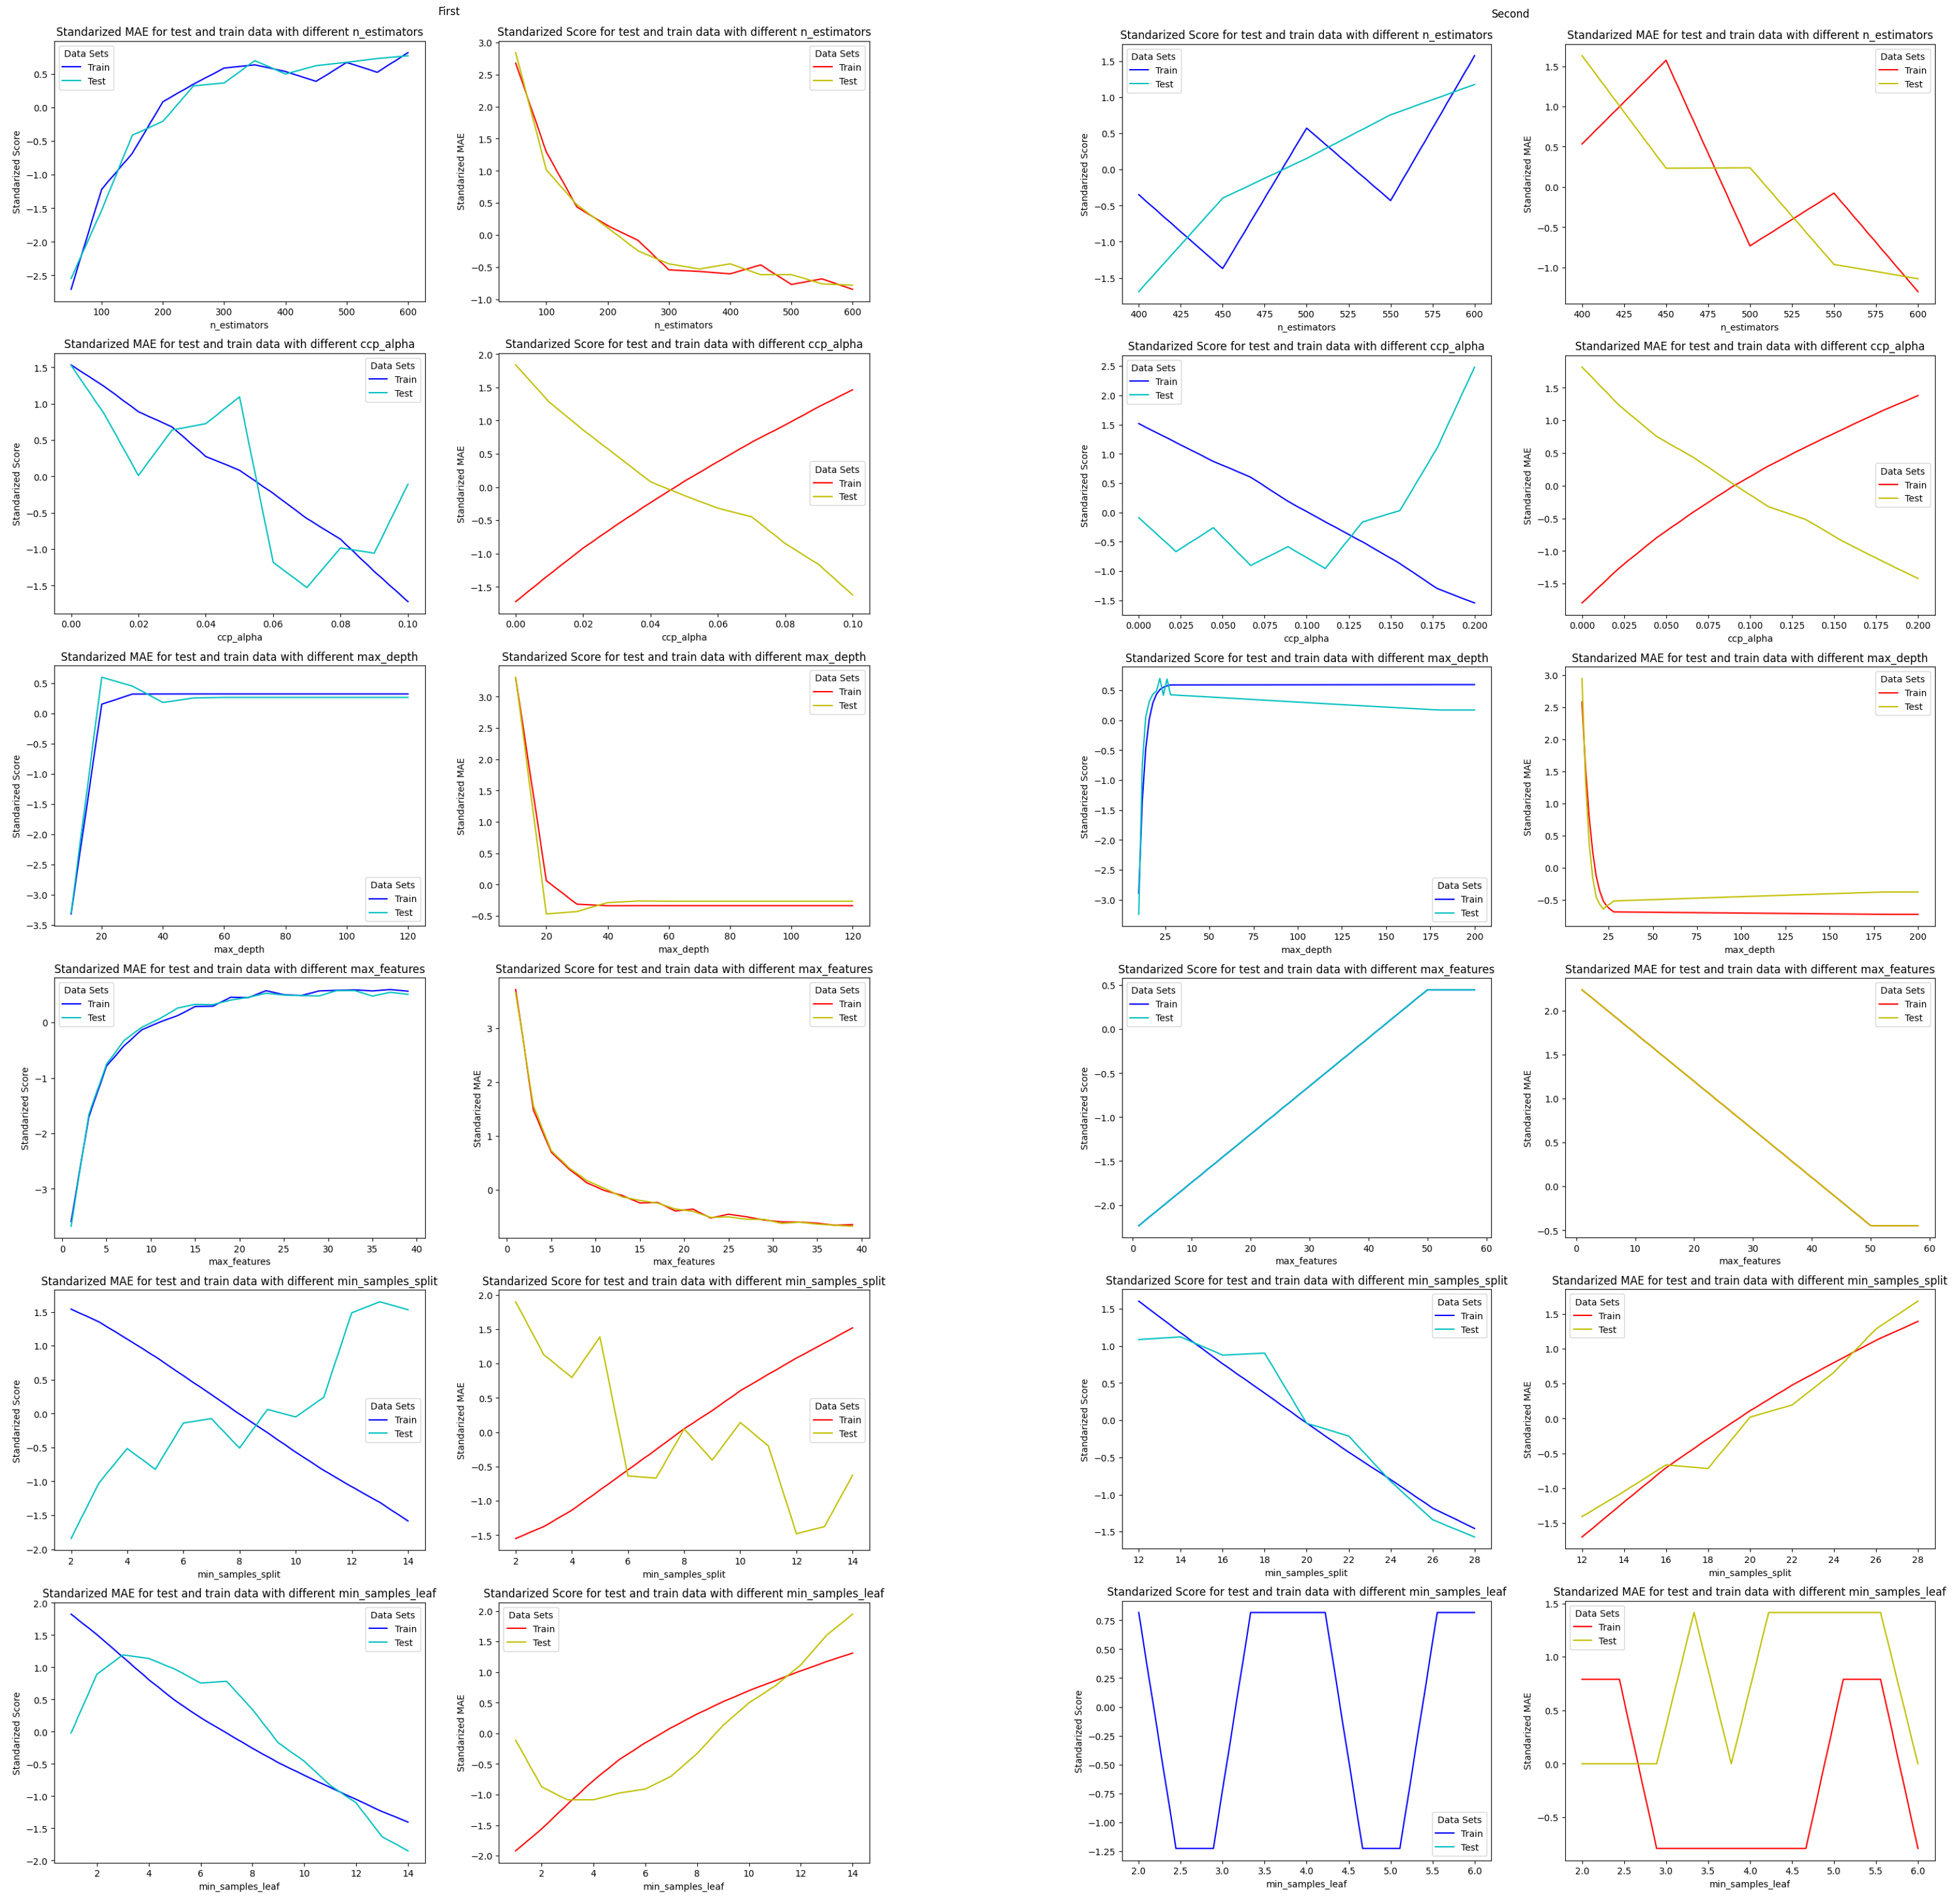

In [86]:
# create figure frome saved pictures
fig = plt.figure(figsize=(40, 40))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# reading images
img1 = Image.open("pictures/score_and_mae.png")
img2 = Image.open("pictures/score_and_mae2.png")
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")

Other Parameters for GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV # Grid search function
# how many trees should we consider , Defalut = 100
n_estimators = [int(x) for x in range(50, 601, 50)]
# Complexity parameter used for Minimal Cost-Complexity Pruning,  Defalut = 0
ccp_alpha = [x for x in np.linspace(0, 0.1, 11)]
#The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node  Defalut = None, accieved by using a number very high
max_depth = [int(x) for x in range(10, 121, 10)]
#max_depth.append(999999)
# This resembles the number of maximum features provided to each tree in a random forest,  Defalut = 1
max_features = [int(x) for x in range(1, 21, 2)]
max_features.extend(["sqrt", "log2", None])
# min_sample_split – a parameter that tells the decision tree in a random forest the minimum required number 
# of observations in any given node in order to split it  Defalut = 2
min_samples_split = [int(x) for x in range(1, 11, 1)]
# minimum number of samples that should be present in the leaf node after splitting a node  Defalut = 1
min_samples_leaf = [int(x) for x in range(1, 11, 1)]
# Are all sampels used? (if false then it is al used)  Defalut = True, obb_score False
bootstrap=[True, False]
oob_score=[True, False]
# Ausführlichkeit der Anpassung  Defalut = 0
verbose= [x for x in np.linspace(0, 10, 11)]
##############################################################

# criterion='squared_error' becuase it is the fastest
criterion='squared_error'
# n_jobs=-1 for all processors
n_jobs=-1



#Splitting of the nodes in the tree and hence restricts the growth of the tree.
max_leaf_nodes = None
# NOT CHANGING, this is NONE
max_sample = None


#################
# Using the last parameters (Not setting on true)
warm_start=False, 

### GridSearchCV (0)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(400, 501, 50)]
# Number of features to consider at every split
max_features = [0.25, 0.5, 1.0]
# Minimum number of samples required at each leaf node
min_samples_leaf = [0.1, 0.25, 1]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Method to controll complexity 
ccp_alpha = [0, 0.001, 0.01]

# Create the param grid
param_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "min_samples_leaf": min_samples_leaf,
               "ccp_alpha": ccp_alpha,
               "bootstrap": bootstrap}

forest = RandomForestRegressor(random_state=144)


In [ ]:
# Run grid search cross validation
grid_search_forest_hype0 = GridSearchCV(estimator = forest, param_grid = param_grid, verbose=1, n_jobs = -1, cv = 3)
grid_search_forest_hype0.fit(Xtrain, ytrain)
# Finding out best parameteers
grid_search_forest_hype0.best_params_

In [ ]:
# Measure the MAE and the Score for the test and the trining data
rf_mae_train_hype0 = mean_absolute_error(ytrain, grid_search_forest_hype0.predict(Xtrain))
rf_mae_test_hype0 = mean_absolute_error(ytest, grid_search_forest_hype0.predict(Xtest))
rf_score_train_hype0 = grid_search_forest_hype0.score(Xtrain, ytrain)
rf_score_test_hype0 = grid_search_forest_hype0.score(Xtest, ytest)

In [98]:
#When the Optimization is not saved this is the calculated forest:
forest_hype0=RandomForestRegressor(random_state=144, n_jobs = -1, n_estimators= 500, min_samples_leaf = 1, max_features = 0.5, ccp_alpha =0.01, bootstrap= True)
forest_hype0.fit(Xtrain, ytrain)

rf_mae_train_hype0 = mean_absolute_error(ytrain, forest_hype0.predict(Xtrain))
rf_mae_test_hype0 = mean_absolute_error(ytest, forest_hype0.predict(Xtest))
rf_score_train_hype0 = forest_hype0.score(Xtrain, ytrain)
rf_score_test_hype0 = forest_hype0.score(Xtest, ytest)

In [99]:
#Checking if the best score needs to be updated
if rf_mae_train_hype0 < rf_mae_train_best and rf_score_train_hype0 > rf_score_train_best:
    rf_mae_train_best = rf_mae_train_hype0
    rf_score_train_best = rf_score_train_hype0
if rf_mae_test_hype0 < rf_mae_test_best and rf_score_test_hype0 > rf_score_test_best:
    rf_mae_test_best = rf_mae_test_hype0
    rf_score_test_best = rf_score_test_hype0

# Print results
print("             --- Hyper1 MAE and Score --- This is the basline --- This is the best ---")
print()
print("-- Training data MAE --")
print(f"Random forest MAE   :   {rf_mae_train_hype0:>10.2f}     |   {rf_mae_train_baseline:>10.2f}      |   {rf_mae_train_best:>10.2f}  ")
print(f"Random forest Score :   {rf_score_train_hype0:>10.2f}     |   {rf_score_train_baseline:>10.2f}      |   {rf_score_train_best:>10.2f}  ")
print()
print("-- Validation data MAE --")
print(f"Random forest MAE   :   {rf_mae_test_hype0:>10.2f}      |   {rf_mae_test_baseline:>10.2f}     |   {rf_mae_test_best:>10.2f}  ")
print(f"Random forest Score :   {rf_score_test_hype0:>10.2f}      |   {rf_score_test_basline:>10.2f}     |   {rf_score_test_best:>10.2f}  ")

             --- Hyper1 MAE and Score --- This is the basline --- This is the best ---

-- Training data MAE --
Random forest MAE   :       150.18     |       148.55      |       148.55  
Random forest Score :         0.99     |         0.99      |         0.99  

-- Validation data MAE --
Random forest MAE   :       350.37      |       343.34     |       343.34  
Random forest Score :         0.95      |         0.94     |         0.94  


### GridSearchCV (1)

In [ ]:
# Setting up the first Hyperparameters that should be tuned

# Number of trees in random forest
n_estimators = [int(x) for x in range(100, 501, 50)]
# Number of features to consider at every split
max_features = [0.25, 0.5, 1.0]
# Minimum number of samples required at each leaf node
min_samples_leaf = [0.1, 0.25, 1]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Method to controll complexity 
ccp_alpha = [0, 0.001, 0.01]

# Create the param grid
param_grid1 = {"n_estimators": n_estimators,
               "max_features": max_features,
               "min_samples_leaf": min_samples_leaf,
               "ccp_alpha": ccp_alpha,
               "bootstrap": bootstrap}

forest = RandomForestRegressor(random_state=144)


In [ ]:
# Run grid search cross validation
grid_search_forest_hype1 = GridSearchCV(estimator = forest, param_grid = param_grid1, verbose=2, n_jobs = -1, cv = 3)
grid_search_forest_hype1.fit(Xtrain, ytrain)
# Finding out best parameteers
grid_search_forest_hype1.best_params_


{'bootstrap': True, 
 'ccp_alpha': 0.01, 
 'max_features': 0.5,
 'min_samples_leaf': 1, 
 'n_estimators': 500}

In [ ]:
# Measure the MAE and the Score for the test and the trining data
rf_mae_train_hype1 = mean_absolute_error(ytrain, grid_search_forest_hype1.predict(Xtrain))
rf_mae_test_hype1 = mean_absolute_error(ytest, grid_search_forest_hype1.predict(Xtest))
rf_score_train_hype1 = grid_search_forest_hype1.score(Xtrain, ytrain)
rf_score_test_hype1 = grid_search_forest_hype1.score(Xtest, ytest)

In [52]:
#When the Optimization is not saved this is the calculated forest:
forest_hype1=RandomForestRegressor(random_state=144, n_estimators= 500, min_samples_leaf = 1, max_features = 0.5, ccp_alpha =0.01, bootstrap= True)
forest_hype1.fit(Xtrain, ytrain)

rf_mae_train_hype1 = mean_absolute_error(ytrain, forest_hype1.predict(Xtrain))
rf_mae_test_hype1 = mean_absolute_error(ytest, forest_hype1.predict(Xtest))
rf_score_train_hype1 = forest_hype1.score(Xtrain, ytrain)
rf_score_test_hype1 = forest_hype1.score(Xtest, ytest)

In [70]:
#Checking if the best score needs to be updated
if rf_mae_train_hype1 < rf_mae_train_best and rf_score_train_hype1 > rf_score_train_best:
    rf_mae_train_best = rf_mae_train_hype1
    rf_score_train_best = rf_score_train_hype1
if rf_mae_test_hype1 < rf_mae_test_best and rf_score_test_hype1 > rf_score_test_best:
    rf_mae_test_best = rf_mae_test_hype1
    rf_score_test_best = rf_score_test_hype1

# Print results
print("             --- Hyper1 MAE and Score --- This is the basline --- This is the best ---")
print()
print("-- Training data MAE --")
print(f"Random forest MAE   :   {rf_mae_train_hype1:>10.2f}     |   {rf_mae_train_baseline:>10.2f}      |   {rf_mae_train_best:>10.2f}  ")
print(f"Random forest Score :   {rf_score_train_hype1:>10.2f}     |   {rf_score_train_baseline:>10.2f}      |   {rf_score_train_best:>10.2f}  ")
print()
print("-- Validation data MAE --")
print(f"Random forest MAE   :   {rf_mae_test_hype1:>10.2f}      |   {rf_mae_test_baseline:>10.2f}     |   {rf_mae_test_best:>10.2f}  ")
print(f"Random forest Score :   {rf_score_test_hype1:>10.2f}      |   {rf_score_test_basline:>10.2f}     |   {rf_score_test_best:>10.2f}  ")

             --- Hyper1 MAE and Score --- This is the basline --- This is the best ---

-- Training data MAE --
Random forest MAE   :       150.18     |       148.55      |       148.55  
Random forest Score :         0.99     |         0.99      |         0.99  

-- Validation data MAE --
Random forest MAE   :       350.37      |       343.34     |       343.34  
Random forest Score :         0.95      |         0.94     |         0.94  


             --- Hyper1 MAE and Score --- This is the basline --- This is the best ---

-- Training data MAE --

Random forest MAE   :       150.18     |       148.55      |       148.55  

Random forest Score :         0.99     |         0.99      |         0.99  

-- Validation data MAE --

Random forest MAE   :       350.37      |       343.34     |       343.34
  
Random forest Score :         0.95      |         0.94     |         0.95 

### RandomizedSearchCV (2)

In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(400, 801, 50)]
n_estimators.append(100)
# Number of features to consider at every split
max_features = [0.25, 0.5, 1.0]
# min_sample_split: the minimum required number of observations in node in order to split it  Defalut = 2
min_samples_split = [int(x) for x in range(8, 14, 1)]
min_samples_split.append(2)
# Minimum number of samples required at each leaf node
min_samples_leaf = [x for x in np.linspace(2, 10, 15)]
# Method of selecting samples for training each tree
# bootstrap = [True]
# #
# oob_score=[True]

# Method to controll complexity 
ccp_alpha = [x for x in np.linspace(0.1, 0.2, 10)]
#max_depth of a tree
max_depth = [int(x) for x in range(10, 30, 2)]
max_depth.append(None)

# Create the param grid
param_distributions = {"n_estimators": n_estimators,
               "max_features": max_features,
               "min_samples_leaf": min_samples_leaf,
               "min_samples_split":min_samples_split,
               "ccp_alpha": ccp_alpha,
            #    "bootstrap": bootstrap,
            #    "oob_score":oob_score,
               "max_depth": max_depth
            }

forest = RandomForestRegressor(random_state=144)


In [46]:
# Run grid search cross validation
random_search_forest = RandomizedSearchCV(estimator = forest, param_distributions = param_distributions, verbose=2,n_iter = 400, n_jobs = -1, cv = 3)
random_search_forest.fit(Xtrain, ytrain)
# Finding out best parameteers
random_search_forest.best_params_

c:\Users\Biebert\miniconda3\envs\dsf\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 10 is smaller than n_iter=400. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 600}

In [ ]:
# Measure the MAE and the Score for the test and the trining data
rf_mae_train_hype2_rand = mean_absolute_error(ytrain, random_search_forest.predict(Xtrain))
rf_mae_test_hype2_rand = mean_absolute_error(ytest, random_search_forest.predict(Xtest))
rf_score_train_hype2_rand = random_search_forest.score(Xtrain, ytrain)
rf_score_test_hype2_rand = random_search_forest.score(Xtest, ytest)

In [88]:
#When the Optimization is not saved this is the calculated forest:
forest_hype2_rand=RandomForestRegressor(random_state=144, n_jobs = -2, oob_score = True, n_estimators= 700, min_samples_split= 26, min_samples_leaf = 4.857142857142857, max_features = None, max_depth= None,ccp_alpha =0.18947368421052632, bootstrap= True)
forest_hype2_rand.fit(Xtrain, ytrain)

rf_mae_train_hype2_rand = mean_absolute_error(ytrain, forest_hype2_rand.predict(Xtrain))
rf_mae_test_hype2_rand = mean_absolute_error(ytest, forest_hype2_rand.predict(Xtest))
rf_score_train_hype2_rand = forest_hype2_rand.score(Xtrain, ytrain)
rf_score_test_hype2_rand = forest_hype2_rand.score(Xtest, ytest)

In [89]:
#Checking if the best score needs to be updated
if rf_mae_train_hype2_rand < rf_mae_train_best and rf_score_train_hype2_rand > rf_score_train_best:
    rf_mae_train_best = rf_mae_train_hype2_rand
    rf_score_train_best = rf_score_train_hype2_rand
if rf_mae_test_hype2_rand < rf_mae_test_best and rf_score_test_hype2_rand > rf_score_test_best:
    rf_mae_test_best = rf_mae_test_hype2_rand
    rf_score_test_best = rf_score_test_hype2_rand

# Print results
print("             --- Hyper1 MAE and Score --- This is the basline --- This is the best ---")
print()
print("-- Training data MAE --")
print(f"Random forest MAE   :   {rf_mae_train_hype2_rand:>10.2f}     |   {rf_mae_train_baseline:>10.2f}      |   {rf_mae_train_best:>10.2f}  ")
print(f"Random forest Score :   {rf_score_train_hype2_rand:>10.2f}     |   {rf_score_train_baseline:>10.2f}      |   {rf_score_train_best:>10.2f}  ")
print()
print("-- Validation data MAE --")
print(f"Random forest MAE   :   {rf_mae_test_hype2_rand:>10.2f}      |   {rf_mae_test_baseline:>10.2f}     |   {rf_mae_test_best:>10.2f}  ")
print(f"Random forest Score :   {rf_score_test_hype2_rand:>10.2f}      |   {rf_score_test_basline:>10.2f}     |   {rf_score_test_best:>10.2f}  ")

             --- Hyper1 MAE and Score --- This is the basline --- This is the best ---

-- Training data MAE --
Random forest MAE   :      2656.37     |       148.55      |       148.55  
Random forest Score :        -0.00     |         0.99      |         0.99  

-- Validation data MAE --
Random forest MAE   :      2664.45      |       343.34     |       343.34  
Random forest Score :        -0.00      |         0.94     |         0.94  


             --- Hyper1 MAE and Score --- This is the basline --- This is the best ---

-- Training data MAE --

Random forest MAE   :      2656.37     |       148.55      |       148.55  

Random forest Score :        -0.00     |         0.99      |         0.99  

-- Validation data MAE --

Random forest MAE   :      2664.45      |       343.34     |       343.34  

Random forest Score :        -0.00      |         0.94     |         0.94  

### GridSearchCV (3)

In [ ]:
from sklearn.model_selection import GridSearchCV # Grid search function

# Number of trees in random forest
n_estimators = [int(x) for x in range(450, 651, 50)]
n_estimators.append(100)
# Number of features to consider at every split
max_features = [None,0.25, 0.5, 1.0]
# min_sample_split: the minimum required number of observations in node in order to split it  Defalut = 2
min_samples_split = [int(x) for x in range(12, 23, 2)]
min_samples_split.append(2)
# Minimum number of samples required at each leaf node
min_samples_leaf = [x for x in np.linspace(2, 4, 3)]
# Method of selecting samples for training each tree
bootstrap = [True]
#
oob_score=[True]

# Method to controll complexity 
ccp_alpha = [x for x in np.linspace(0, 0.2, 10)]
#max_depth of a tree
max_depth = [int(x) for x in range(15, 21, 2)]
max_depth.append(None)

# Create the param grid
param_grid1 = {"n_estimators": n_estimators,
               "max_features": max_features,
            #    "min_samples_leaf": min_samples_leaf,
            #    "min_samples_split":min_samples_split,
            #    "ccp_alpha": ccp_alpha,
            #    "bootstrap": bootstrap,
            #    "oob_score":oob_score,
               "max_depth": max_depth}

forest = RandomForestRegressor(random_state=144)


In [91]:
# Run grid search cross validation
grid_search_forest3 = GridSearchCV(estimator = forest, param_grid = param_grid1, verbose=2, n_jobs = -1, cv = 2)
grid_search_forest3.fit(Xtrain, ytrain)
# Finding out best parameteers
grid_search_forest3.best_params_

Fitting 2 folds for each of 20160 candidates, totalling 40320 fits


KeyboardInterrupt: 

In [ ]:
# Measure the MAE and the Score for the test and the trining data
rf_mae_train_hype3_grid = mean_absolute_error(ytrain, random_search_forest.predict(Xtrain))
rf_mae_test_hype3_grid= mean_absolute_error(ytest, random_search_forest.predict(Xtest))
rf_score_train_hype3_grid = random_search_forest.score(Xtrain, ytrain)
rf_score_test_hype3_grid = random_search_forest.score(Xtest, ytest)

In [ ]:
#When the Optimization is not saved this is the calculated forest:
forest_hype3_grid=RandomForestRegressor(random_state=144, n_jobs = -2) ##########################Values
forest_hype3_grid.fit(Xtrain, ytrain)

rf_mae_train_hype3_grid = mean_absolute_error(ytrain, forest_hype3_grid.predict(Xtrain))
rf_mae_test_hype3_grid = mean_absolute_error(ytest, forest_hype3_grid.predict(Xtest))
rf_score_train_hype3_grid = forest_hype3_grid.score(Xtrain, ytrain)
rf_score_test_hype3_grid = forest_hype3_grid.score(Xtest, ytest)

In [10]:
#Checking if the best score needs to be updated
if rf_mae_train_hype3_grid < rf_mae_train_best and rf_score_train_hype3_grid > rf_score_train_best:
    rf_mae_train_best = rf_mae_train_hype3_grid
    rf_score_train_best = rf_score_train_hype3_grid
if rf_mae_test_hype3_grid < rf_mae_test_best and rf_score_test_hype3_grid > rf_score_test_best:
    rf_mae_test_best = rf_mae_test_hype3_grid
    rf_score_test_best = rf_score_test_hype3_grid

# Print results
print("             --- Hyper3 MAE and Score --- This is the basline --- This is the best ---")
print()
print("-- Training data MAE --")
print(f"Random forest MAE   :   {rf_mae_train_hype3_grid:>10.2f}     |   {rf_mae_train_baseline:>10.2f}      |   {rf_mae_train_best:>10.2f}  ")
print(f"Random forest Score :   {rf_score_train_hype3_grid:>10.2f}     |   {rf_score_train_baseline:>10.2f}      |   {rf_score_train_best:>10.2f}  ")
print()
print("-- Validation data MAE --")
print(f"Random forest MAE   :   {rf_mae_test_hype3_grid:>10.2f}      |   {rf_mae_test_baseline:>10.2f}     |   {rf_mae_test_best:>10.2f}  ")
print(f"Random forest Score :   {rf_score_test_hype3_grid:>10.2f}      |   {rf_score_test_basline:>10.2f}     |   {rf_score_test_best:>10.2f}  ")

----- Hyper2 MAE and Score -----

-- Training data MAE --
Random forest MAE     :    2655.88
Random forest Score     :      -0.00

-- Validation data MAE --
Random forest MAE     :    2663.93
Random forest Score     :      -0.00
